In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score , recall_score
from sklearn.model_selection import GridSearchCV 


In [2]:
df = pd.read_csv('Dataset\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
column_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
df[column_to_replace] = df[column_to_replace].replace(0, np.nan)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180,32.9,0.171,63,0
764,2,122.0,70.0,27.0,0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112,26.2,0.245,30,0
766,1,126.0,60.0,NaN,0,30.1,0.349,47,1


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


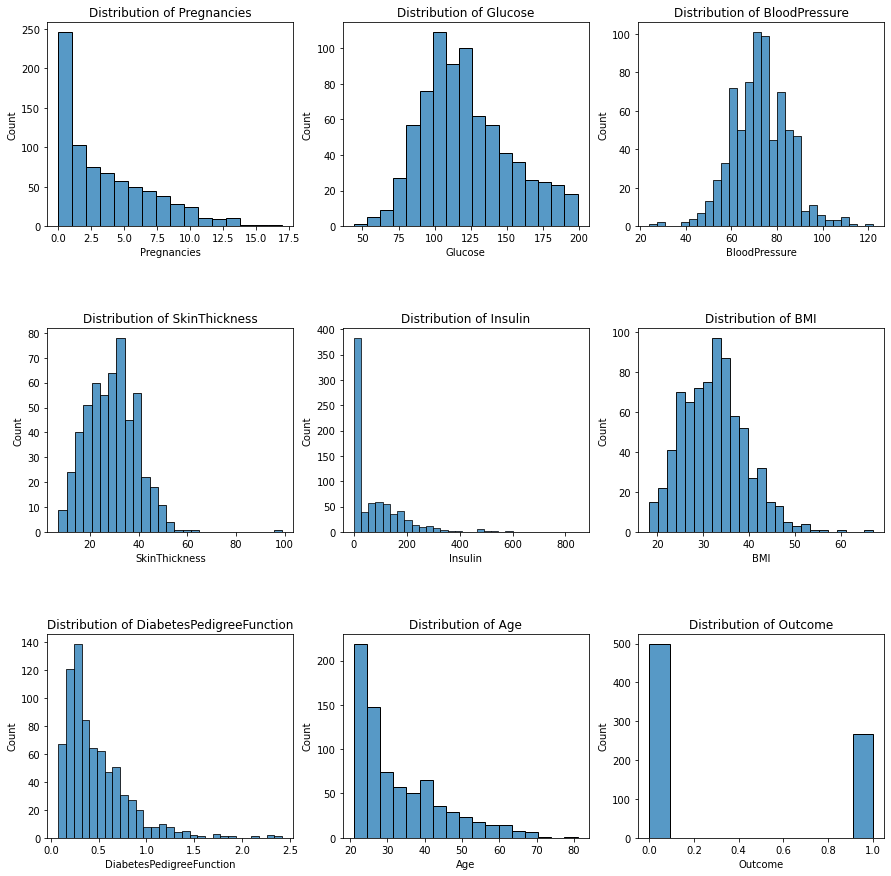

In [8]:
num_cols = 3 

num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.show()

d:\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\a

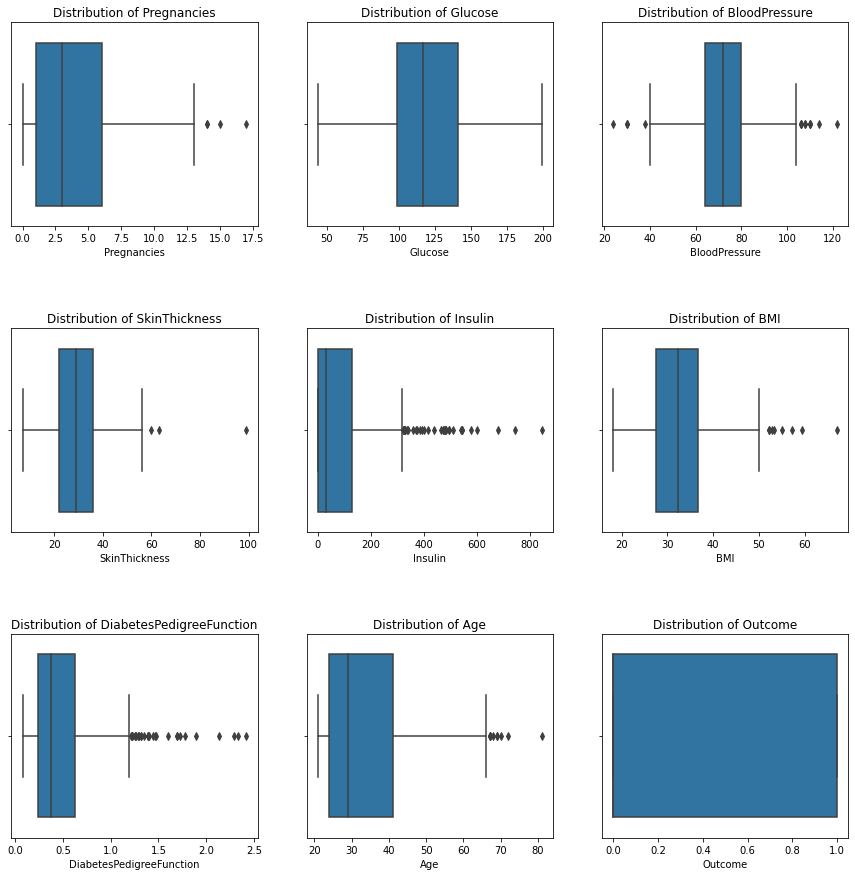

In [9]:
num_cols = 3 

num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.boxplot(df[column], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.show()

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
def replace_outliers_zscore(df, column, n_std):
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - n_std * std
    upper_bound = mean + n_std * std

    df[column] = df[column].apply(lambda x: min(max(x, lower_bound), upper_bound))

In [12]:
def replace_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: min(max(x, lower_bound), upper_bound))

In [13]:
NormalDistColumns = ['BloodPressure', 'BMI']
for col in NormalDistColumns:
    replace_outliers_zscore(df, col, 3)

In [14]:
NotNormalDistColumn = ['Pregnancies', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']
for col in NotNormalDistColumn:
    replace_outliers_iqr(df, col)

d:\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\a

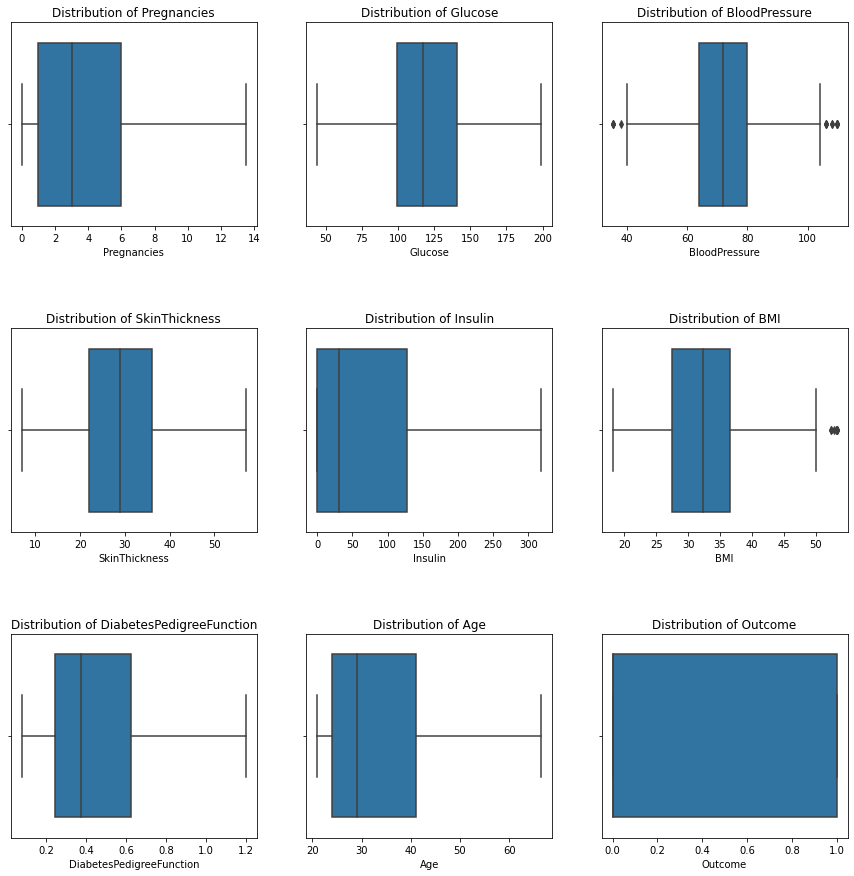

In [15]:
num_cols = 3 

num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.boxplot(df[column], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.show()

In [16]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [17]:
MissingNormalDistColumns = ['BloodPressure', 'BMI']
for col in MissingNormalDistColumns:
    mean = df[col].mean()
    std = df[col].std()

    nan_count = df[col].isnull().sum()

    random_values = np.random.normal(mean, std, nan_count)

    nan_index = df[col].index[df[col].isnull()]
    df.loc[nan_index, col] = random_values

In [18]:
MissingNotNormalDistColumns = ['Glucose', 'SkinThickness']
for col in MissingNotNormalDistColumns:
    lower_bound = df[col].min()
    upper_bound = df[col].max()

    nan_count = df[col].isnull().sum()

    random_values = np.random.uniform(lower_bound, upper_bound, nan_count)

    nan_index = df[col].index[df[col].isnull()]
    df.loc[nan_index, col] = random_values

In [19]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.000000,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,49.862673,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.000000,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.000000,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.000000,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.000000,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,19.630434,0.0,30.1,0.349,47.0,1


# Scaling

In [21]:
mm_scaler = preprocessing.MinMaxScaler()
data_scaled = pd.DataFrame(mm_scaler.fit_transform(df),columns = df.columns)

data_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.444444,0.670968,0.494546,0.560000,0.000000,0.439593,0.489305,0.637363,1.0
1,0.074074,0.264516,0.413785,0.440000,0.000000,0.239778,0.243316,0.219780,0.0
2,0.592593,0.896774,0.386864,0.857253,0.000000,0.145579,0.529412,0.241758,1.0
3,0.074074,0.290323,0.413785,0.320000,0.295481,0.282595,0.079323,0.000000,0.0
4,0.000000,0.600000,0.063819,0.560000,0.528094,0.710770,1.000000,0.263736,1.0
...,...,...,...,...,...,...,...,...,...
763,0.740741,0.367742,0.548387,0.820000,0.565815,0.419611,0.082888,0.923077,0.0
764,0.148148,0.503226,0.467626,0.400000,0.000000,0.530937,0.233512,0.131868,0.0
765,0.370370,0.496774,0.494546,0.320000,0.352063,0.228360,0.148841,0.197802,0.0
766,0.074074,0.529032,0.333023,0.252609,0.000000,0.339685,0.241533,0.571429,1.0


# Modeling

In [22]:
data = data_scaled.copy()

In [23]:
X = data.drop('Outcome' , axis = 1)
y = data['Outcome']

In [24]:
data['Outcome']

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64

Count of 0: 500
Count of 1: 268


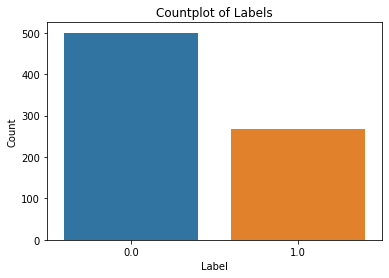

In [25]:
value_counts = y.value_counts()
print("Count of 0:", value_counts[0])
print("Count of 1:", value_counts[1])

sns.countplot(x=y)

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Countplot of Labels')

plt.show()

In [26]:
#Balancing target by over sampling
smote = SMOTE(k_neighbors = 10)
X, y = smote.fit_resample(X, y)

Count of 0: 500
Count of 1: 500


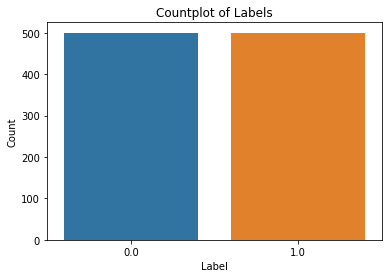

In [27]:
value_counts = y.value_counts()
print("Count of 0:", value_counts[0])
print("Count of 1:", value_counts[1])

sns.countplot(x=y)

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Countplot of Labels')

plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [29]:
#def func for multiple modleing

def Cls_model_GrdSrch_Tune(model, Data, X, y, params):
    
    clf = GridSearchCV(model, params, scoring ='accuracy', cv = 5)
    clf.fit(X, y)
    
    print("best score is :" , clf.best_score_)
    print("best estimator is :" , clf.best_estimator_)
    print("best Params is :" , clf.best_params_)
    
    return (clf.best_score_)

In [30]:
models_lables = ["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]
models = [RandomForestClassifier(),GB(),knn(),LogisticRegression(),SVC()]
Model_Accuracy_default = []

for models_lable, model in zip(models_lables, models):
    print('*****************************************')
    print(models_lable)
    Accuracy = Cls_model_GrdSrch_Tune(model, data, X_train, y_train, {})
    Model_Accuracy_default.append(Accuracy)

*****************************************
RandomForestClassifier
best score is : 0.81125
best estimator is : RandomForestClassifier()
best Params is : {}
*****************************************
Gaussian Naive Bays
best score is : 0.73625
best estimator is : GaussianNB()
best Params is : {}
*****************************************
KNN
best score is : 0.775
best estimator is : KNeighborsClassifier()
best Params is : {}
*****************************************
Logistic_Regression


d:\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

best score is : 0.7550000000000001
best estimator is : LogisticRegression()
best Params is : {}
*****************************************
Support_Vector
best score is : 0.7874999999999999
best estimator is : SVC()
best Params is : {}


In [31]:
AccuracyList_default = pd.DataFrame({ 
     "Classification Model" :models,
     "Accuracy":Model_Accuracy_default
    })
AccuracyList_default.sort_values( by = 'Accuracy' , ascending = False)

,Classification Model,Accuracy
0,RandomForestClassifier(),0.81125
4,SVC(),0.78750
2,KNeighborsClassifier(),0.77500
3,LogisticRegression(),0.75500
1,GaussianNB(),0.73625


In [32]:
models_lables = ["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]

models = [RandomForestClassifier(),GB(),knn(),LogisticRegression(),SVC()]

params_RFC = {   
                'n_estimators': [5, 10, 15, 19, 20, 21, 25, 30, 35, 40],
                'min_samples_split': [2, 3, 4, 5, 6],
                'criterion' : ["gini", "entropy"]
            }
params_GB = {
        
            }  
params_KNN = {
               'n_neighbors':[3, 4, 5, 10, 15, 20],
               'weights':('uniform','distance'),
               'p':[1,5]
             }  
params_LR = {
             'C': [0.01,0.1,1,10],'penalty':('l1','l2'),
             'penalty': ('l1', 'l2', 'elasticnet')
            }    
params_SVC = {
    
              'C': [0.1, 1, 10, 20, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,10], 
              'kernel': ['rbf']
             } 

params = [params_RFC, params_GB, params_KNN, params_LR, params_SVC]

Model_Accuracy_tunned = []

# lst = zip(models_lables, models, params)
# list(lst)

for models_lable, model, param in zip(models_lables, models, params):
    print('*****************************************')
    print(models_lable)
    
    Accuracy = Cls_model_GrdSrch_Tune(model, data, X_train, y_train, param)
    Model_Accuracy_tunned.append(Accuracy)
    

*****************************************
RandomForestClassifier
best score is : 0.825
best estimator is : RandomForestClassifier(min_samples_split=4, n_estimators=40)
best Params is : {'criterion': 'gini', 'min_samples_split': 4, 'n_estimators': 40}
*****************************************
Gaussian Naive Bays
best score is : 0.73625
best estimator is : GaussianNB()
best Params is : {}
*****************************************
KNN


d:\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

best score is : 0.79875
best estimator is : KNeighborsClassifier(n_neighbors=20, p=1, weights='distance')
best Params is : {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
*****************************************
Logistic_Regression


d:\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "d:\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _che

best score is : 0.76
best estimator is : LogisticRegression(C=10)
best Params is : {'C': 10, 'penalty': 'l2'}
*****************************************
Support_Vector
best score is : 0.7975
best estimator is : SVC(C=10, gamma=10)
best Params is : {'C': 10, 'gamma': 10, 'kernel': 'rbf'}


In [33]:
AccuracyList_tunned = pd.DataFrame({ 
     "Classification Model" :models,
     "Accuracy":Model_Accuracy_tunned
    })
AccuracyList_tunned.sort_values( by = 'Accuracy' , ascending = False)

,Classification Model,Accuracy
0,RandomForestClassifier(),0.82500
2,KNeighborsClassifier(),0.79875
4,SVC(),0.79750
3,LogisticRegression(),0.76000
1,GaussianNB(),0.73625


In [34]:
AccuracyList_final = pd.DataFrame({ 
     "Classification Model" :models,
     "Accuracy_with_default_config":Model_Accuracy_default,
     "Accuracy_with_tunned_params": Model_Accuracy_tunned
    })
AccuracyList_final.sort_values(by = 'Accuracy_with_tunned_params' , ascending = False)

,Classification Model,Accuracy_with_default_config,Accuracy_with_tunned_params
0,RandomForestClassifier(),0.81125,0.82500
2,KNeighborsClassifier(),0.77500,0.79875
4,SVC(),0.78750,0.79750
3,LogisticRegression(),0.75500,0.76000
1,GaussianNB(),0.73625,0.73625


In [35]:
params = {'n_estimators' : [40],
          'min_samples_split' : [2],
          'criterion': ["gini"]
         }
BestModel = RandomForestClassifier(n_estimators= 40, min_samples_split= 2, criterion = 'gini')
BestModel.fit(X_train, y_train)
y_predicted = BestModel.predict(X_test)

In [36]:
conf_matrix = confusion_matrix(y_test, y_predicted)

acc_score = accuracy_score(y_test, y_predicted)
pre_score = precision_score(y_test, y_predicted)
re_score = recall_score(y_test, y_predicted)

print('accuracy_score : ', acc_score)
print('precision_score : ', pre_score)
print('recall_score : ', re_score, '\n')

print('Accuracy of RandomForestClassifier is: ', acc_score * 100)
print('Precision of RandomForestClassifier is: ', pre_score * 100)
print('Recall of KRandomForestClassifier is: ', re_score * 100, '\n')

print('Confusion_Matrix : ',"\n" , conf_matrix,  '\n')

accuracy_score :  0.825
precision_score :  0.8108108108108109
recall_score :  0.8653846153846154 

Accuracy of RandomForestClassifier is:  82.5
Precision of RandomForestClassifier is:  81.08108108108108
Recall of KRandomForestClassifier is:  86.53846153846155 

Confusion_Matrix :  
 [[75 21]
 [14 90]] 



In [37]:
xgbCLF = xgb.XGBClassifier()

In [38]:
xgbCLF.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [39]:
train_predictions_xgbCLF = xgbCLF.predict(X_train)
test_predictions_xgbCLF = xgbCLF.predict(X_test)

In [40]:
train_accuracy = accuracy_score(y_train, train_predictions_xgbCLF)
test_accuracy = accuracy_score(y_test, test_predictions_xgbCLF)

In [41]:
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 100.00%
Test Accuracy: 81.50%
